# PROJECT -
# INX FUTURE INC EMPLOYEE PERFORMANCE ANALYSIS:

**It is a classification task.**

## Business Case: Performance rating of the employees based on the given features:

# SUMMARY OF EXPLOTARY DATA ANALYSIS:

- Data exploration techniques is used to explore and visualize data to uncover insights it include visualization and to explore and identify relationships between different data variables,to check the presence of outliers, and the distribution of data values in order to reveal patterns to gain greater insight into the raw data.
- Data exploration refers to the act of examining data to translate various sources of intelligence into actionable insights based on some statistical techniques.


**Exploratory data analysis comprises of-**

- Analyzing the data
- Statistical measures of data
- Checking the distribution of continuous features
- Department Wise performance
- Visualizing the percentage count of employee department with performance rating
- Visualizing the top 3 Important Factors which affects employee performance
- Checking distribution of mean of data
- checking distribution of median of data
- checking distribution of mode of data
- Checking distribution of standard deviation of data
- Checking the skewnwness of the features
- Checking the kurtosis of the features
- Checking for outliers in the continuous features

# IMPORTATION OF NECESSARY LIBRARIES:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')

# LOADING THE DATA FOR EXPLOTARY DATA ANALYSIS:

In [2]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
pd.set_option('display.max_columns',None) # Used to display the all features

- The following dataset has both categorical and numerical columns, the data type is represented as 'object' and 'int64' respectively.

# Statistical analysis of the data

In [3]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


- From the above analysis, it can be concluded that there is no constant values in the numerical feature.

In [4]:
data.describe(include='O')

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


- From the above analysis, it can be concluded that there is no constant feature in the categorical feature.

# Checking for outliers in the continuous features

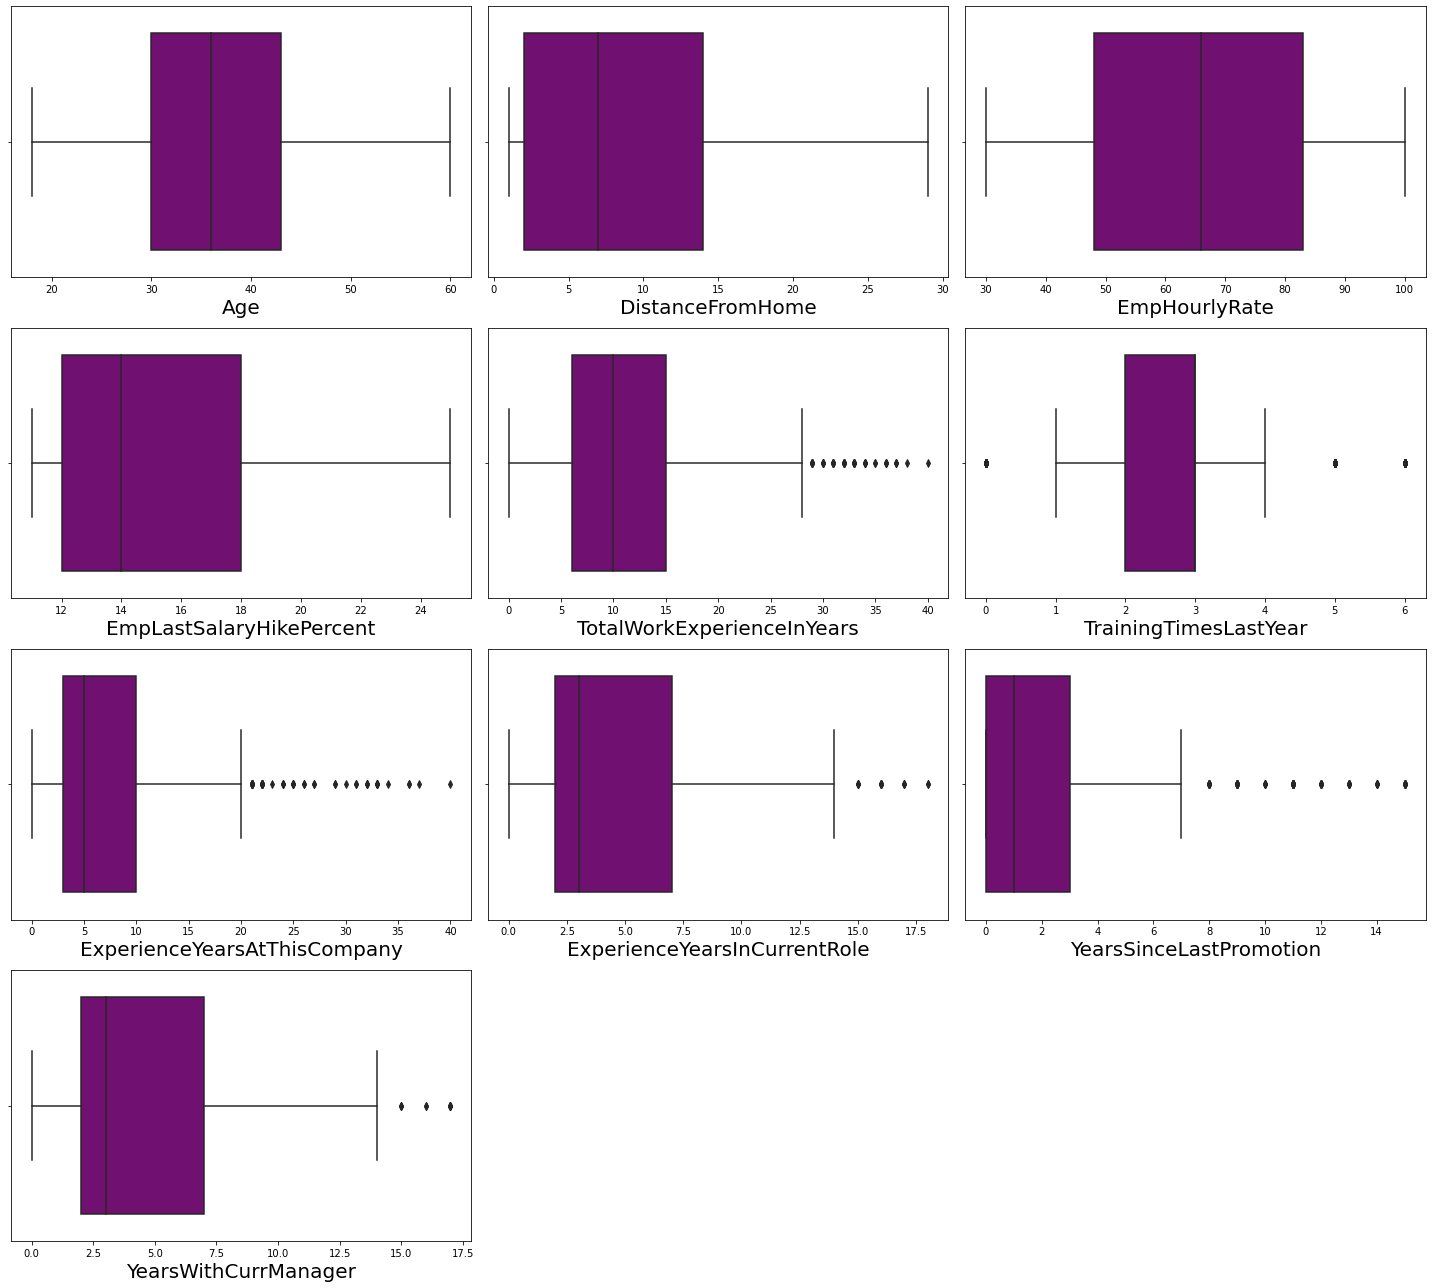

In [40]:
check = data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18)) #Defining canvas size
plotno = 1 #Counter

for column in check: #Iteration of columns 
    if plotno<=12:    #Setting the limit
        plt.subplot(4,3,plotno) #Plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(check[column],color='purple') # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  #Assigning name to x-axis and font size is 20
    plotno+=1 #Counter increment
plt.tight_layout()
plt.show() #Used to hide the storage loction

**OBSERVATION-**
- From the above boxplot, the dataset seems to not have any extreme values.
- Through domain knowledge it is considered that these features cannot be considered as outliers as experience of the employees, promotion of the employees can vary among employees to employees.

# Checking for distribution in the continuous features

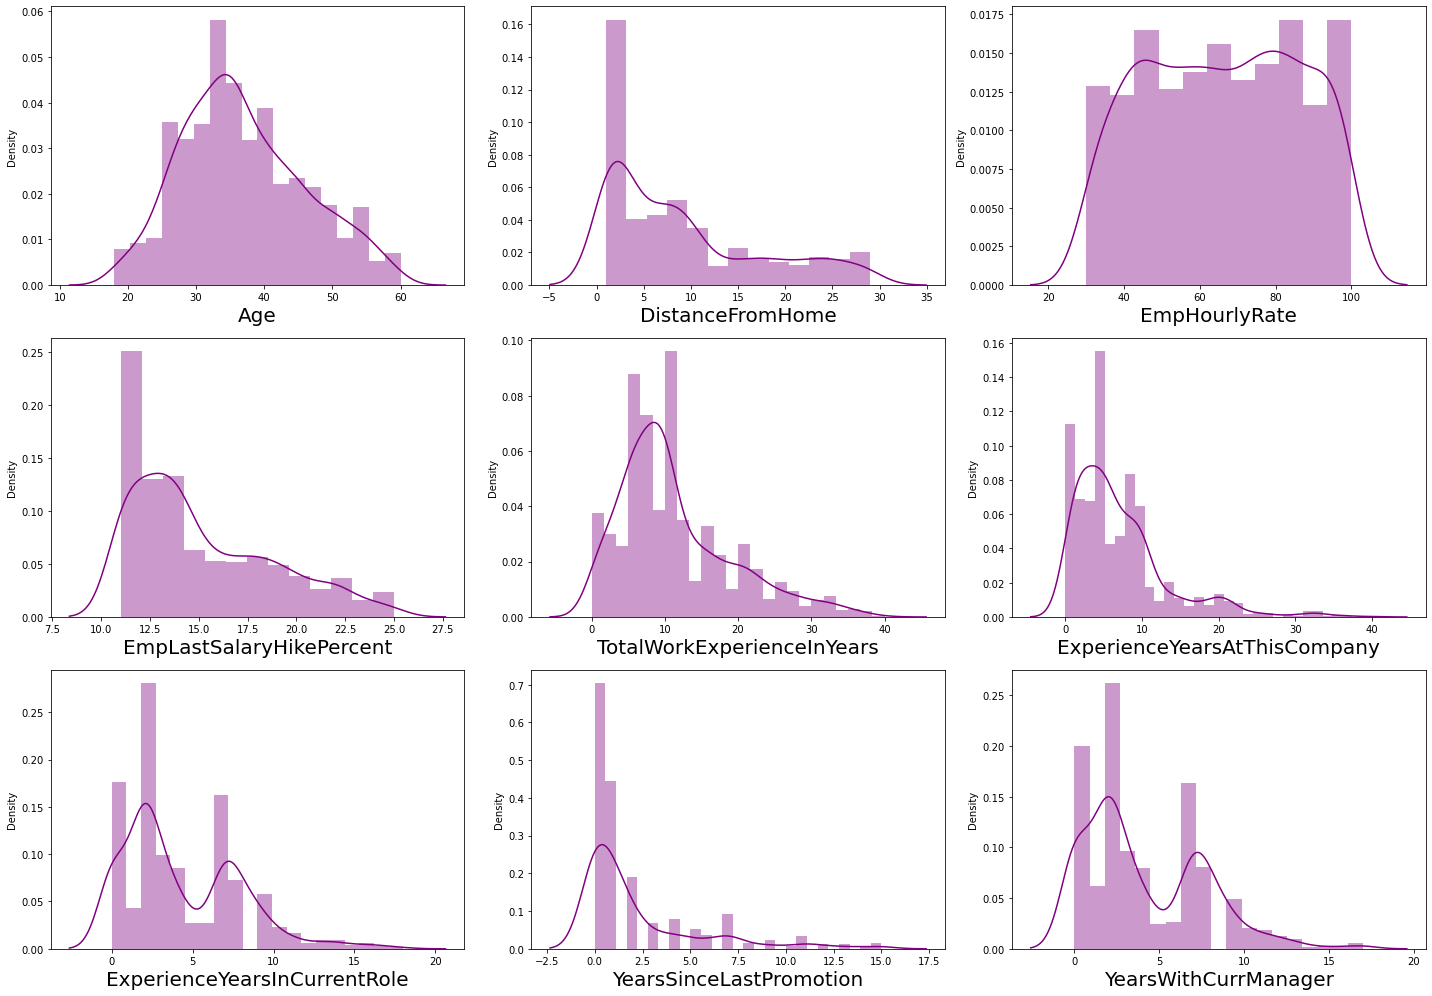

In [41]:
#Checking distribution
check = data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18)) #Defining canvas size
plotno = 1 #Counter

for column in check: #Iteration of columns 
    if plotno<=12:    #Setting the limit
        plt.subplot(4,3,plotno) #Plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.distplot(check[column],color='purple') # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  #Assigning name to x-axis and font size is 20
    plotno+=1 #Counter increment
plt.tight_layout()
plt.show() #Used to hide the storage loction

**OBSERVATION-**
- The feature Age can be considered as Normally distributed.
- The features DistanceFromHome,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,
  ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,
  YearsSinceLastPromotion,YearsWithCurrManager are not Normally distributed and are skewed distribution mostly Right skewed.

**Insights expected from this project**

# DEPARTMENT WISE PERFORMANCE RATING

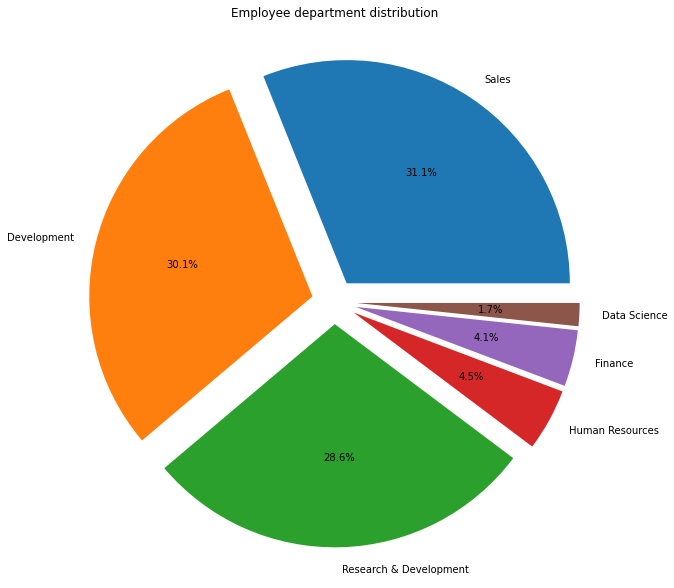

In [42]:
# Set the figure size
plt.figure(figsize=(10,15))
Employee_department_counts = data['EmpDepartment'].value_counts()
plt.pie(Employee_department_counts,labels=Employee_department_counts.index, autopct='%1.1f%%', explode=[0.1]*len(Employee_department_counts))
# Set the title of the pie chart
plt.title('Employee department distribution')
# Display the pie chart
plt.show()

# Observation
- Datascience has the lowest count and sales has the highest counts.

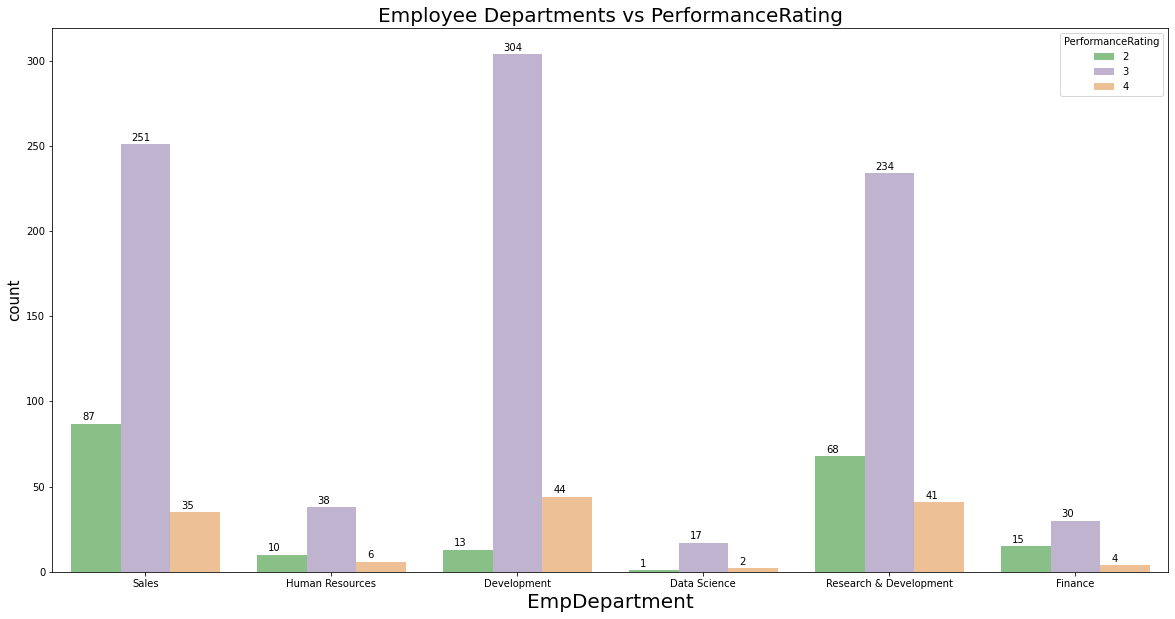

In [44]:
plt.figure(figsize=(20,10),facecolor='white')
ax = sns.countplot(x='EmpDepartment',hue=data.PerformanceRating,data=data,palette='Accent')
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.06, i.get_height()+2))
plt.title('Employee Departments vs PerformanceRating',fontsize=20)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('count',fontsize=15)
plt.show()

**OBSERVATION-**

- Sales: The total count on sale is 373.The performance rating 3 has the maximum counts, the performance rating 4 has   the minimum counts.
- Human Resources: The total count on Human Resources is 54.The performance rating 3 has the maximum counts, the         performance rating 4 has the minimum counts.
- Development: The total count on Human Resources is 361.The performance rating 3 has the maximum counts, the           performance rating 2 has the minimum counts.
- Data Science: The total count on Human Resources is 20.The performance rating 3 has the maximum counts, the           performance rating 2 and 4 has almost same minimum counts.
- Research & Development:The total count on Human Resources is 343.The performance rating 3 has the maximum counts,     the performance rating 4 has the minimum count.
- Finance:The total count on Human Resources is 49.The performance rating 3 has the maximum counts, the performance     rating 4 has the minimum counts
- The performance rating 3 has the highest counts in all the departments.

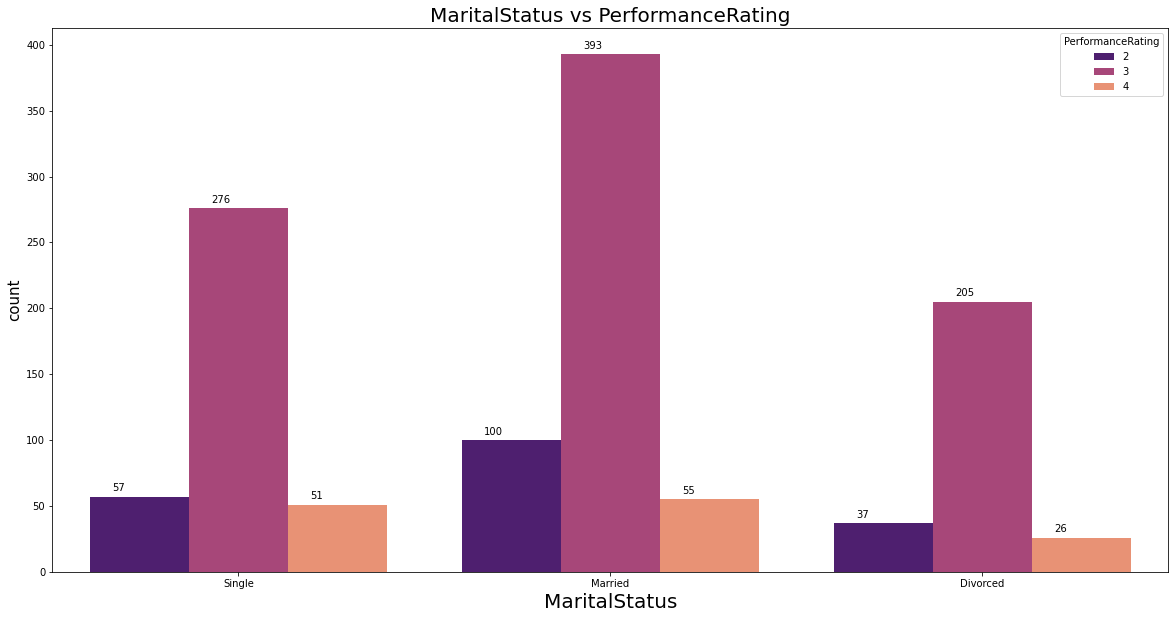

In [48]:
plt.figure(figsize=(20,10),facecolor='white')
ax = sns.countplot(x='MaritalStatus',hue=data.PerformanceRating,data=data,palette='magma')
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.06, i.get_height()+4))
plt.title('MaritalStatus vs PerformanceRating',fontsize=20)
plt.xlabel('MaritalStatus',fontsize=20)
plt.ylabel('count',fontsize=15)
plt.show()

**OBSERVATION-**
- Single- The performance rating 3 has the highest counts.
- Married- The performance rating 3 has the highest counts.
- Divorced- The performance rating 3 has the highest counts.

**Relationship between EmpDepartment and performance rating with respect to gender**

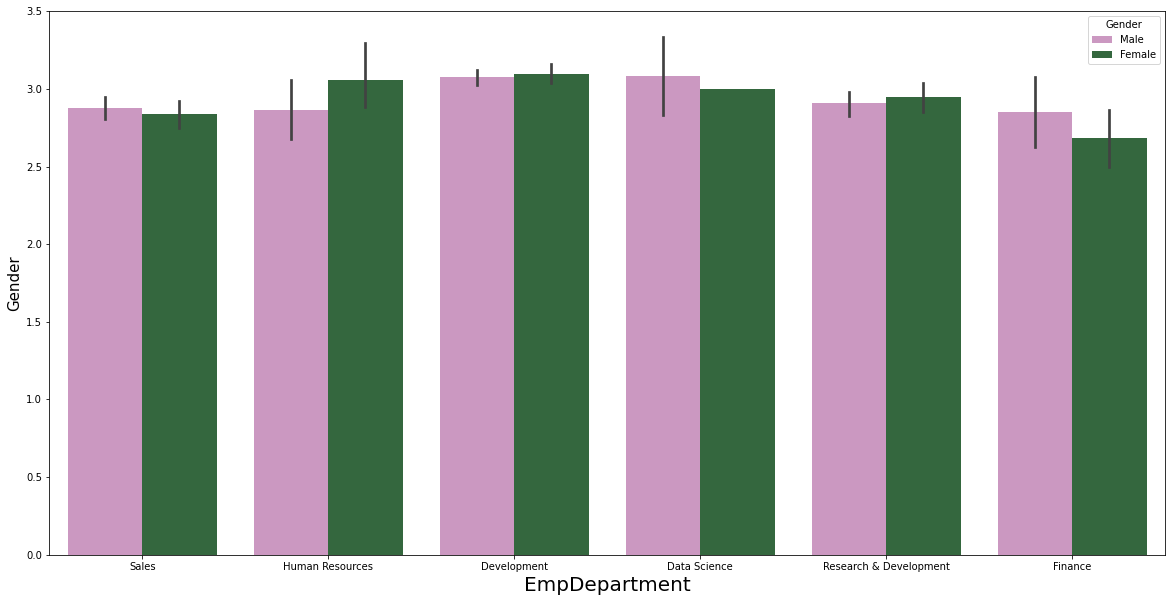

In [38]:
plt.figure(figsize=(20,10),facecolor='white')
sns.barplot(x='EmpDepartment',y='PerformanceRating',hue=data.Gender,data=data,palette='cubehelix_r')
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('Gender',fontsize=15)
plt.show()

**Relationship between EmpDepartment and age with respect to Gender**

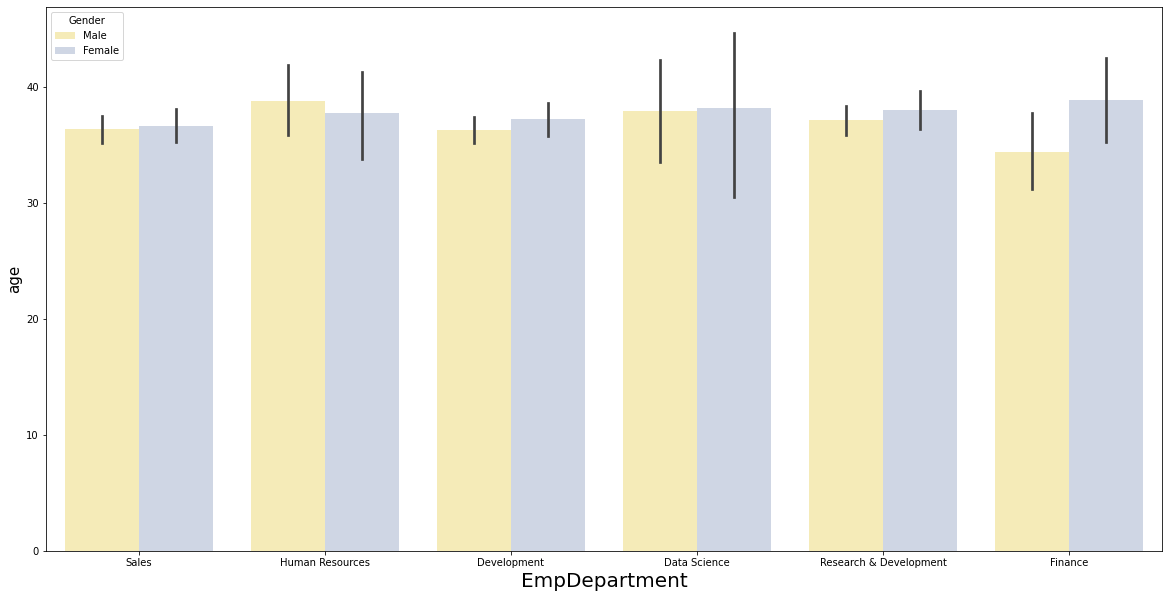

In [36]:
plt.figure(figsize=(20,10),facecolor='white')
sns.barplot(x='EmpDepartment',y='Age',hue=data.Gender,data=data,palette='Pastel2_r')
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('age',fontsize=15)
plt.show()

**Overall visualization of employee department with performance rating**
- EmpDepartment Development department shows High performance rating as shown in the above graphs

Sales: The Performace rating level 3 is maximum in the sales department. The male employees performance rating is higher than the female employees.The employees not leaving the company is higher.

Human Resources: The Performace rating level 3 is maximum in the Human resource department.The female employee rating is higher than the male employees. The employees not leaving the company is higher.

Development: The performance rating 3 has the maximum counts.The gender-based performance is nearly same for both.
The employee not leaving the company is higher.

Data Science: The performance rating 3 has the maximum counts in data science department. Data science is the only department where less number of level 2 performers and level 1 performers are present.Male employees are performing well. The employees not leaving the company is higher and the data science is the department which has a overall performance better than the other -departments.

Research & Development: The performance rating 3 has the maximum counts. The female employees has higher performance rating than the males. The employees not leaving the company is higher

Finance: The performance rating 3 has the maximum counts. The male employees has higher performance rating than the males. The employees not leaving the company is higher.


- In almost all the departments the age doesn't exceed 40 years.
- Development department has the youngest employees.

# Visualizing the percentage count of employee department with performance rating

In [31]:
percent = pd.crosstab(data["PerformanceRating"], data["EmpDepartment"], margins=True,normalize=True)
round(percent.multiply(100),2)

EmpDepartment,Data Science,Development,Finance,Human Resources,Research & Development,Sales,All
PerformanceRating,,,,,,,
2,0.08,1.08,1.25,0.83,5.67,7.25,16.17
3,1.42,25.33,2.50,3.17,19.50,20.92,72.83
4,0.17,3.67,0.33,0.50,3.42,2.92,11.00
All,1.67,30.08,4.08,4.50,28.58,31.08,100.00


**OBSERVATION**
- The performance rating 3 is highest in Development followed by sales and human resources.

# Visualizing the top 3 Important Factors which affects employee performance
- In the visualization notebook, it was visualized that these three features plays an important role in determining the performance rating of the employees.
- EmpLastSalaryHikePercent
- EmpEnvironmentSatisfaction
- YearsSinceLastPromotion

In [32]:
# 1.Employee last salary hike percent
pd.crosstab(data['EmpLastSalaryHikePercent'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpLastSalaryHikePercent,,,,
11,28,140,1,169
12,30,123,2,155
13,27,138,3,168
14,28,140,4,172
15,11,67,4,82
16,12,54,2,68
17,9,55,3,67
18,10,63,0,73
19,10,51,2,63


**OBSERVATION-**
- The EmpLastSalaryHikePercent 14 and 11 has the highest count and has performance rating 3
- EmpLastSalaryHikePercent less has performance rating is 4


In [33]:
# 2.EmpEnvironmentSatisfaction
pd.crosstab(data['EmpEnvironmentSatisfaction'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpEnvironmentSatisfaction,,,,
1,90,127,13,230
2,98,130,14,242
3,3,310,54,367
4,3,307,51,361
All,194,874,132,1200


**OBSERVATION-**
- The Maximum Number of Employees Performance Rating with EmpEnvironmentSatisfaction Level 3 & Level 4.



In [34]:
# 3.YearsSinceLastPromotion
pd.crosstab(data['YearsSinceLastPromotion'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
YearsSinceLastPromotion,,,,
0,3,405,61,469
1,66,195,36,297
2,37,83,7,127
3,15,25,5,45
4,14,37,2,53
5,10,21,4,35
6,8,12,4,24
7,15,41,6,62
8,5,6,0,11


**OBSERVATION-**
- The years since last promotion 0 has highest performance rating of 3 and the count is 405
- The years since last promotion 15 has the lowest performance rating at 2, 3 and in even 4 and the count is 11
- This indicates that when the employees are in the initial stage of year since last promotion the performance is best and as the year of last promotion increases the employees performance decreases.

# Checking distribution of mean of data

In [ ]:
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
features = data.columns.values[0:27]
plt.title('Distribution of mean per row in the data',fontsize=20)
plt.xlabel('Mean value',fontsize=20)
plt.ylabel('PDF value',fontsize=15)
sns.distplot(data[features].mean(axis=1),color='ORANGE', kde=True)
plt.show()

**OBSERVATION-**
- The mean of the entire data is visualised and the curve is a bell curve showing normal distribution.
- The mean value is nearly 9 to 9.5
- From the graph it can be concluded that most of the data lies between 8 to 12 and the range is 4 to 20.

# checking distribution of median of data

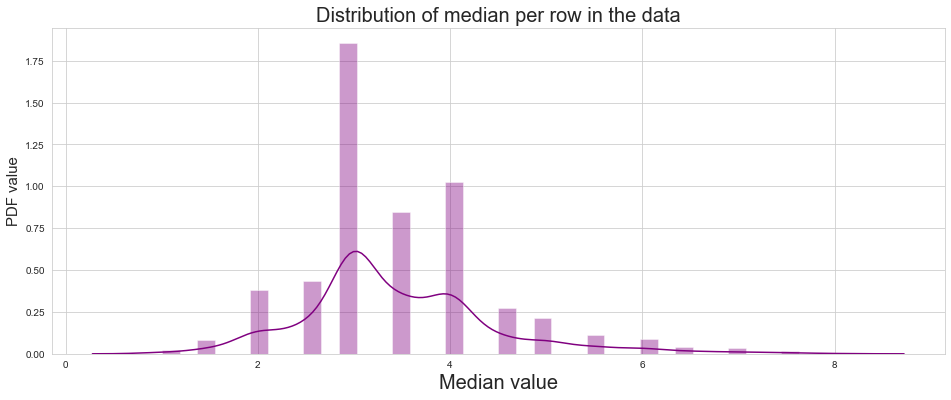

In [51]:
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
features = data.columns.values[0:27]
plt.title('Distribution of median per row in the data',fontsize=20)
plt.xlabel('Median value',fontsize=20)
plt.ylabel('PDF value',fontsize=15)
sns.distplot(data[features].median(axis=1),color='purple', kde=True)
plt.show()

**OBSERVATION-**
- The distribution of median is also a Normally distributed curve.
- the range is from 0 to 8
- Maximum of the data lies between 2 to 4 which is considered as the median or the middle value.

# Checking distribution of standard deviation of data

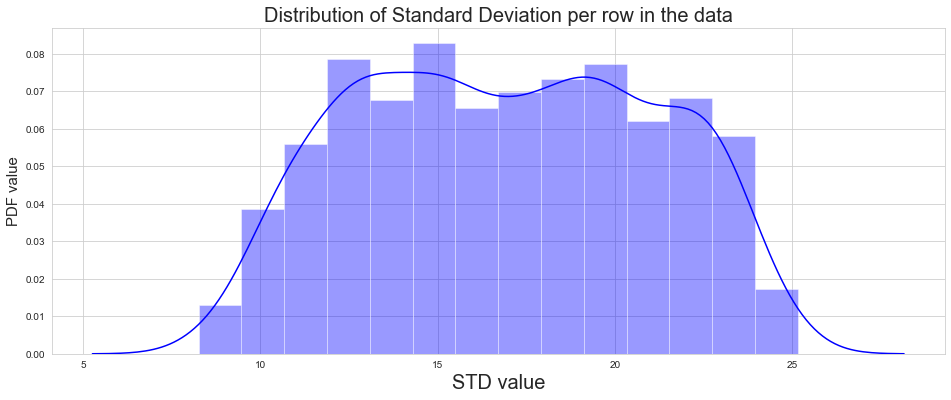

In [52]:
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
features = data.columns.values[0:27]
plt.title('Distribution of Standard Deviation per row in the data',fontsize=20)
plt.xlabel('STD value',fontsize=20)
plt.ylabel('PDF value',fontsize=15)
sns.distplot(data[features].std(axis=1),color='blue', kde=True)
plt.show()

**OBSERVATION-**
- Around 30% of feature standard deviation around the range of 3 3 to 20 and remaining 70% feature standard deviation in between 0 to 2
- The distribution is normally distributed.

# Checking the skewnwness of the features

In [55]:
print('The Skewness of Distance From Home Feature :',data.DistanceFromHome.skew())
print('The Skewness of Employee Hourly Rate Feature :',data.EmpHourlyRate.skew())
print('The Skewness of Employee Last Salary Hike Percent Feature :',data.EmpLastSalaryHikePercent.skew())
print('The Skewness of Total Work Experiance In Year Feature :',data.TotalWorkExperienceInYears.skew())
print('The Skewness of Experiance Year At This Company Feature :',data.ExperienceYearsAtThisCompany.skew())
print('The Skewness of Experiance Year In Current Role Feature :',data.ExperienceYearsInCurrentRole.skew())
print('The Skewness of Year Since Last Promotion Feature :',data.YearsSinceLastPromotion.skew())
print('The Skewness of Years With Current Manager Feature :',data.YearsWithCurrManager.skew())

The Skewness of Distance From Home Feature : 0.9629561160828001
The Skewness of Employee Hourly Rate Feature : -0.035164888157941436
The Skewness of Employee Last Salary Hike Percent Feature : 0.8086536332261228
The Skewness of Total Work Experiance In Year Feature : 1.0868618597364565
The Skewness of Experiance Year At This Company Feature : 1.789054979919473
The Skewness of Experiance Year In Current Role Feature : 0.8881586703270758
The Skewness of Year Since Last Promotion Feature : 1.9749315589155791
The Skewness of Years With Current Manager Feature : 0.8131582957766446


**INSIGHTS-**

- Skewness is a measurement of the distortion of symmetrical distribution or asymmetry in a data set. Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.
- There are different scenerios of skewness-
- A positively skewed distribution is the right-skewed distribution with the long tail on its right side.
- A negatively skewed distribution is the left-skewed distribution with the long tail on its left side. 

- Feature skewness was checked using statistical method and it was found that the feature **Year Since Last Promotion Feature**, **Total Work Experiance In Year Feature** and **Experiance Year At This Company Feature** have skewed data as the value among the other features is higher so we need to do feature transformation in data preprocessing.

# Checking the kurtosis of the features

In [56]:
print('The kurtosis of Distance From Home Feature :',data.DistanceFromHome.kurtosis())
print('The kurtosis of Employee Hourly Rate Feature :',data.EmpHourlyRate.kurtosis())
print('The kurtosis of Employee Last Salary Hike Percent Feature :',data.EmpLastSalaryHikePercent.kurtosis())
print('The kurtosis of Total Work Experiance In Year Feature :',data.TotalWorkExperienceInYears.kurtosis())
print('The kurtosis of Experiance Year At This Company Feature :',data.ExperienceYearsAtThisCompany.kurtosis())
print('The kurtosis of Experiance Year In Current Role Feature :',data.ExperienceYearsInCurrentRole.kurtosis())
print('The kurtosis of Year Since Last Promotion Feature :',data.YearsSinceLastPromotion.kurtosis())
print('The kurtosis of Years With Current Manager Feature :',data.YearsWithCurrManager.kurtosis())

The kurtosis of Distance From Home Feature : -0.24201677636189256
The kurtosis of Employee Hourly Rate Feature : -1.1868905128360532
The kurtosis of Employee Last Salary Hike Percent Feature : -0.29974077544117517
The kurtosis of Total Work Experiance In Year Feature : 0.8056333333819827
The kurtosis of Experiance Year At This Company Feature : 4.057959404441291
The kurtosis of Experiance Year In Current Role Feature : 0.4380286874251209
The kurtosis of Year Since Last Promotion Feature : 3.5390800793468817
The kurtosis of Years With Current Manager Feature : 0.14820164456972984


**INSIGHTS-**
- Kurtosis is a measure of the tailedness of a distribution. Tailedness is how often outliers occur.
- There are different types of kurtosis- 
- A mesokurtic distribution is medium-tailed, so outliers are neither highly frequent, nor highly infrequent.
- A platykurtic distribution is thin-tailed, meaning that outliers are infrequent.
- A leptokurtic distribution is fat-tailed, meaning that there are a lot of outliers.

- Feature Kurtosis was checked using statistical method and it was found that the feature **Year Since Last Promotion Feature** and **Experiance Year At This Company Feature** have skewed data as the value among the other features is higher so we need to do feature transformation in data preprocessing.